<a href="https://colab.research.google.com/github/Bhavleenk/ML-Model-Retraining/blob/main/Time_Series/time_series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

In [ ]:
df = pd.read_csv('DailyDelhiClimateTrain.csv')
df.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [ ]:
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)
df.head()

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667
2013-01-02,7.400000,92.000000,2.980000,1017.800000
2013-01-03,7.166667,87.000000,4.633333,1018.666667
2013-01-04,8.666667,71.333333,1.233333,1017.166667
2013-01-05,6.000000,86.833333,3.700000,1016.500000


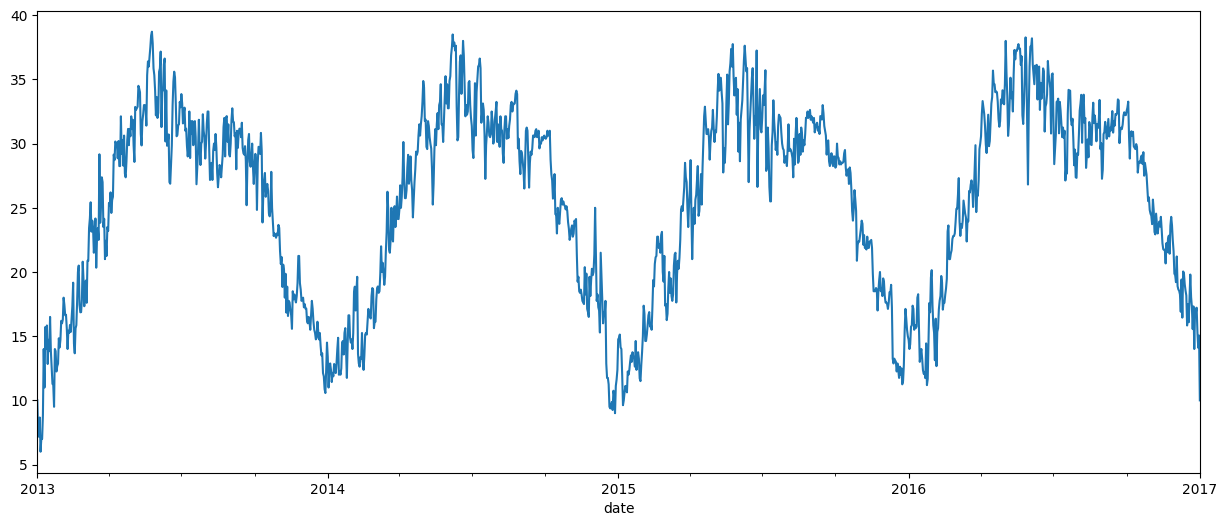

In [ ]:
plt.figure(figsize=(15,6))
df['meantemp'].plot()
plt.show()

In [ ]:
n_cols = 1
dataset = df['meantemp']
dataset = pd.DataFrame(dataset)
data = dataset.values
data.shape

(1462, 1)

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(np.array(data))
train_size = int(len(data) * 0.8)
test_size = len(data) - train_size
print(f"train: {train_size}; test: {test_size}")
train_data = scaled_data[0:train_size, :]
train_data.shape

train: 1169; test: 293


(1169, 1)

In [ ]:
x_train = []
y_train = []
time_steps = 12
n_cols = 1

In [ ]:
for i in range(time_steps, len(scaled_data)):
    x_train.append(scaled_data[i-time_steps:i, :n_cols])
    y_train.append(scaled_data[i, :n_cols])
x_train[:2]
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], n_cols))
x_train.shape, y_train.shape
model = Sequential([
    LSTM(100, activation='relu', return_sequences=True, input_shape=(x_train.shape[1], n_cols)),
    LSTM(100, activation='relu', return_sequences=True),
    LSTM(50, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1)
])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 12, 100)           40800     
                                                                 
 lstm_4 (LSTM)               (None, 12, 100)           80400     
                                                                 
 lstm_5 (LSTM)               (None, 50)                30200     
                                                                 
 dense_2 (Dense)             (None, 16)                816       
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 152233 (594.66 KB)
Trainable params: 152233 (594.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001), loss="mse", metrics=['mean_absolute_error'])

In [ ]:
history = model.fit(x_train, y_train, epochs=100, batch_size=8)

Epoch 1/100
182/182 [==============================] - 13s 21ms/step - loss: 0.0265 - mean_absolute_error: 0.1073
Epoch 2/100
182/182 [==============================] - 4s 22ms/step - loss: 0.0101 - mean_absolute_error: 0.0791
Epoch 3/100
182/182 [==============================] - 4s 24ms/step - loss: 0.0088 - mean_absolute_error: 0.0745
Epoch 4/100
182/182 [==============================] - 3s 18ms/step - loss: 0.0079 - mean_absolute_error: 0.0713
Epoch 5/100
182/182 [==============================] - 3s 18ms/step - loss: 0.0071 - mean_absolute_error: 0.0671
Epoch 6/100
182/182 [==============================] - 4s 24ms/step - loss: 0.0070 - mean_absolute_error: 0.0668
Epoch 7/100
182/182 [==============================] - 4s 20ms/step - loss: 0.0065 - mean_absolute_error: 0.0639
Epoch 8/100
182/182 [==============================] - 3s 18ms/step - loss: 0.0062 - mean_absolute_error: 0.0629
Epoch 9/100
182/182 [==============================] - 3s 18ms/step - loss: 0.0062 - mean_absol

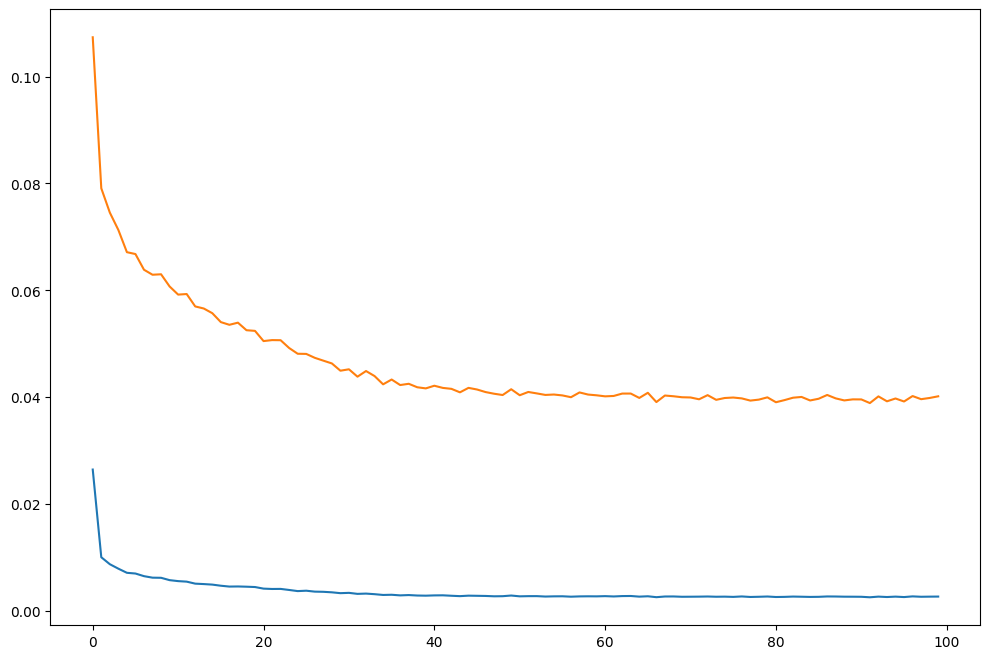

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(history.history["loss"])
plt.plot(history.history["mean_absolute_error"])
plt.show()

In [ ]:
time_steps = 12
test_data = scaled_data[train_size - time_steps:, :]

x_test = []
y_test = []
n_cols = 1

In [ ]:
for i in range(time_steps, len(test_data)):
    x_test.append(test_data[i-time_steps:i, 0:n_cols])
    y_test.append(test_data[i, 0:n_cols])

In [ ]:
x_test, y_test = np.array(x_test), np.array(y_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], n_cols))
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
predictions.shape

10/10 [==============================] - 1s 11ms/step


(293, 1)

In [ ]:
y_test = scaler.inverse_transform(y_test)

In [ ]:
RMSE = np.sqrt(np.mean((y_test-predictions)**2)).round(2)
print(RMSE)

1.75


In [ ]:
preds_acts = pd.DataFrame(data={"Predictions": predictions.flatten(), "Actuals": y_test.flatten()})
preds_acts

,Predictions,Actuals
0,23.429585,24.066667
1,24.752108,23.937500
2,24.678932,26.312500
3,26.476793,26.187500
4,26.759214,26.785714
...,...,...
288,17.371605,17.217391
289,17.726793,15.238095
290,16.089474,14.095238
291,14.837826,15.052632


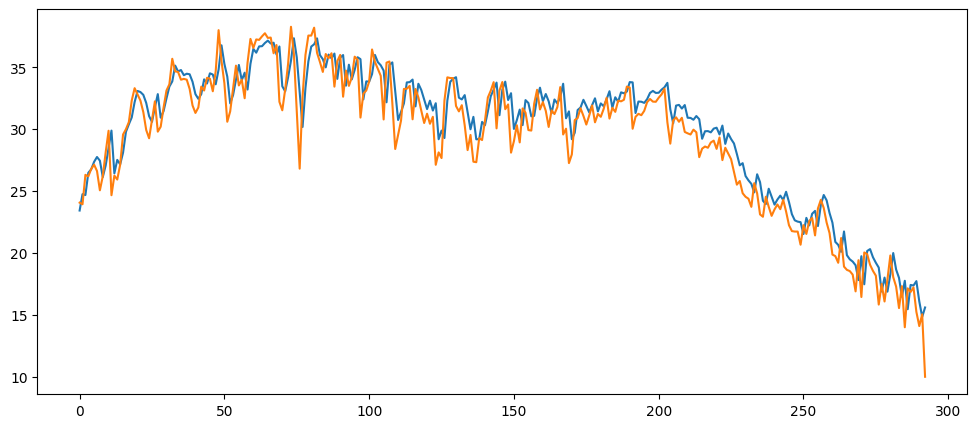

In [ ]:
plt.figure(figsize=(12,5))
plt.plot(preds_acts["Predictions"])
plt.plot(preds_acts["Actuals"])
plt.show()

In [ ]:
train = dataset.iloc[:train_size, 0:1]
test = dataset.iloc[train_size:, 0:1]
test["Predictions"] = predictions

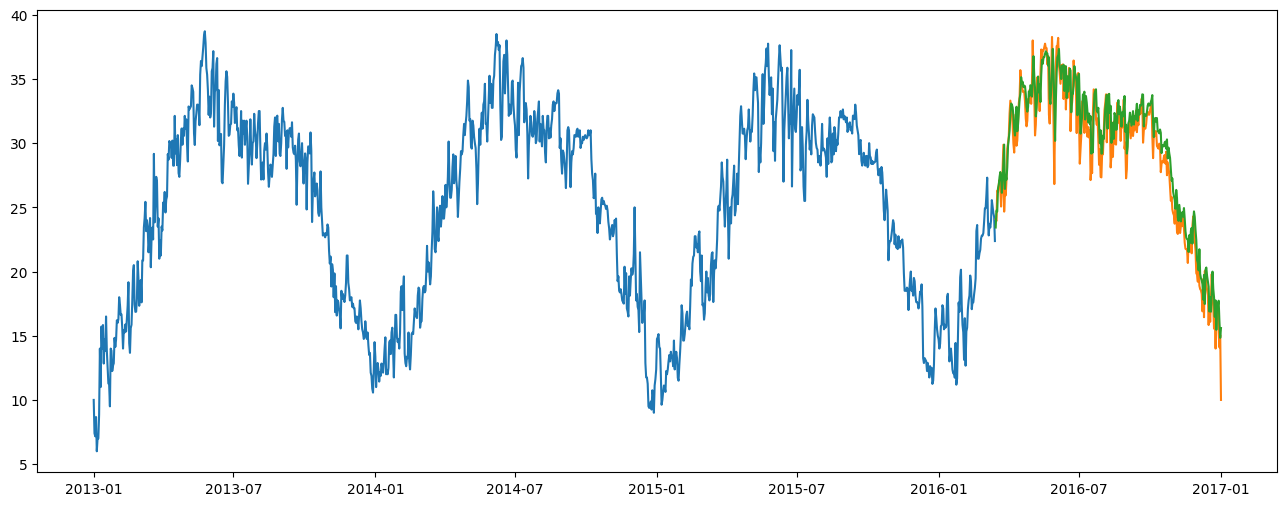

In [ ]:
plt.figure(figsize=(16, 6))
plt.plot(train['meantemp'])
plt.plot(test['meantemp'])
plt.plot(test['Predictions'])

# Retrain Model

In [ ]:
def check_degrade_and_retrain(model,predictions,y_test)
  RMSE_THRESHOLD = 1
  RMSE = np.sqrt(np.mean((y_test-predictions)**2)).round(2)
  if RMSE > RMSE_THRESHOLD:
    new_x_train = x_train # fetch more train data
    new_y_train = y_train # fetch more train data
    model.fit(new_x_train, new_y_train, epochs=100, batch_size=8)

Now schedule check_degrade_and_retain function (say every day).
If the model is degraded at the checkpoint, it will fetch more data and retrain the model.

Trigger: At every checkpoint, evaluation metric (RMSE in this case)

Scheduling in google colab is done by google scheduler (similar to cronjob)